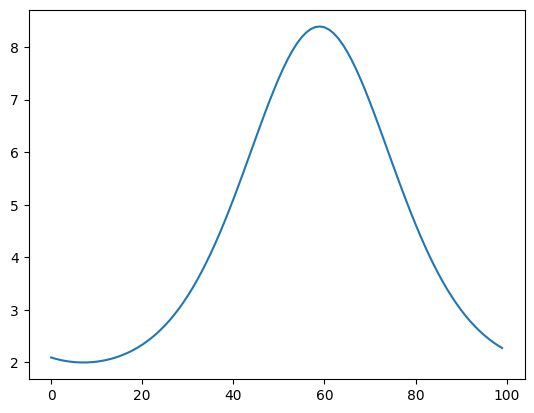

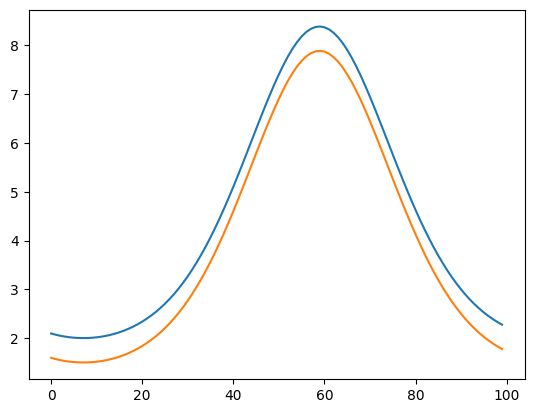

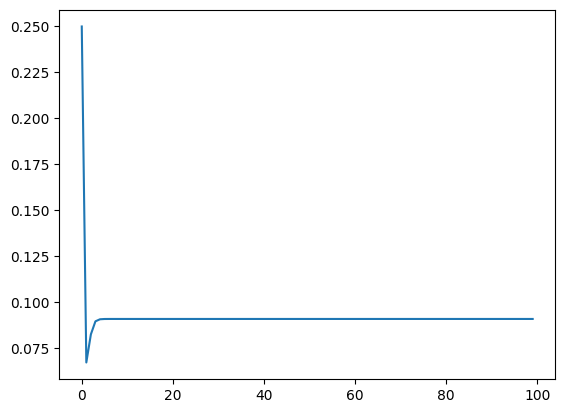

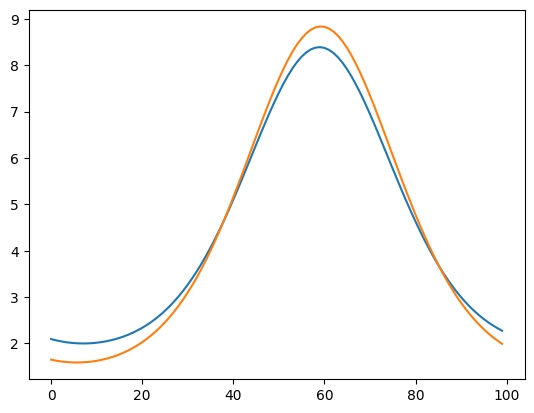

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

omega_0_true = 1.0
beta_0_true = 1.0
omega_1_true = 1.0
beta_1_true = 1.0
omega_2_true = 1.0
beta_2_true = 1.0
def f(x, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2):
    return beta_2 + omega_2 * np.exp(beta_1 + omega_1 * np.sin(beta_0 + omega_0 * x))

true_func = partial(f, omega_0=omega_0_true, beta_0=beta_0_true, omega_1=omega_1_true, beta_1=beta_1_true, omega_2=omega_2_true, beta_2=beta_2_true)

x = np.linspace(-3, 3, 100)
plt.figure()
plt.plot(true_func(x))
# plt.plot(true_func(x))

def compute_grad(x_in, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2):
    f_0 = beta_0 + omega_0 * x_in
    h_1 = np.sin(f_0)
    f_1 = omega_1 * h_1 + beta_1
    h_2 = np.exp(f_1)
    f_2 = omega_2 * h_2 + beta_2
    loss = np.mean((f_2 - true_func(x_in))**2)
    dl_df2 = np.mean(2 * (f_2 - true_func(x_in)))
    dl_domega2 = dl_df2 * h_2
    dl_dbeta2 = dl_df2
    
    df2_dh2 = omega_2
    dl_dh2 = dl_df2 * df2_dh2
    dh2_df1 = h_2
    dl_df1 = dl_dh2 * dh2_df1
    dl_domega1 = dl_df1 * h_1
    dl_beta1 = dl_df1
    
    df1_dh1 = omega_1
    dl_dh1 = dl_df1 * df1_dh1
    dh1_df0 = np.cos(f_0)
    dl_df0 = dl_dh1 * dh1_df0
    dl_domega0 = dl_df0 * x_in
    dl_dbeta0 = dl_df0
    
    return loss, dl_domega0, dl_dbeta0, dl_beta1, dl_domega1, dl_domega2, dl_dbeta2

omega_0 = 1.0
beta_0 = 1.0
omega_1 = 1.0
beta_1 = 1.0
omega_2 = 1.0
beta_2 = 0.5
lr = 0.01
loss_vals = []
plt.figure()
plt.plot(true_func(x))
plt.plot(f(x, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2))
for i in range(100):
    loss, dl_domega0, dl_dbeta0, dl_beta1, dl_domega1, dl_domega2, dl_dbeta2 = compute_grad(x, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2)
    omega_0 -= lr * np.mean(dl_domega0)
    beta_0 -= lr * np.mean(dl_dbeta0)
    omega_1 -= lr * np.mean(dl_domega1)
    beta_1 -= lr * np.mean(dl_beta1)
    omega_2 -= lr * np.mean(dl_domega2)
    beta_2 -= lr * np.mean(dl_dbeta2)
    loss_vals.append(loss)
    
plt.figure()
plt.plot(loss_vals)
plt.show()

plt.figure()
plt.plot(true_func(x))
plt.plot(f(x, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2))
